In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm

/Users/takizawatakafumi/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
data = pd.read_csv("data/data3a.csv")
data.head()

,y,x,f
0,6,8.31,C
1,6,9.44,C
2,6,9.50,C
3,12,9.07,C
4,10,10.16,C


In [6]:
data.dtypes

y      int64
x    float64
f     object
dtype: object

In [7]:
labels, uniques = pd.factorize(data['f'])
data['f'] = labels
data.head()

,y,x,f
0,6,8.31,0
1,6,9.44,0
2,6,9.50,0
3,12,9.07,0
4,10,10.16,0


In [8]:
uniques

Index(['C', 'T'], dtype='object')

In [9]:
data.describe()

,y,x,f
count,100.000000,100.000000,100.000000
mean,7.830000,10.089100,0.500000
std,2.624881,1.008049,0.502519
min,2.000000,7.190000,0.000000
25%,6.000000,9.427500,0.000000
50%,8.000000,10.155000,0.500000
75%,10.000000,10.685000,1.000000
max,15.000000,12.400000,1.000000


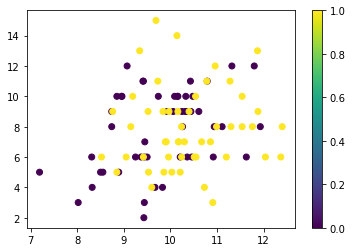

In [19]:
plt.scatter(data['x'], data['y'], c=data['f'], cmap='viridis')
plt.colorbar()

In [25]:
model = sm.GLM(data['y'], sm.add_constant(data['x']), family=sm.families.Poisson())
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Thu, 06 Dec 2018   Deviance:                       84.993
Time:                        15:02:19   Pearson chi2:                     83.8
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2917      0.364      3.552      0.000       0.579       2.005
x              0.0757      0.036      2.125      0.034       0.006       0.145
==============================================================================
"""

In [26]:
results.llf

-235.3862507698608

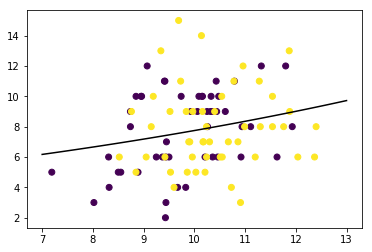

In [35]:
x = np.linspace(7, 13, 100)
lamda_ = 1.29 + 0.0757 * x
est = np.exp(lamda_)
plt.scatter(data['x'], data['y'], c=data['f'], cmap='viridis')
plt.plot(x, est, '-', color='black')

In [36]:
# 施肥処理の有無を説明変数として組み込んだモデル
model = sm.GLM(data['y'], sm.add_constant(data['f']), family=sm.families.Poisson())
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -237.63
Date:                Thu, 06 Dec 2018   Deviance:                       89.475
Time:                        15:43:06   Pearson chi2:                     87.1
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0516      0.051     40.463      0.000       1.952       2.151
f              0.0128      0.071      0.179      0.858      -0.127       0.153
==============================================================================
"""

In [37]:
# 個体の体サイズと施肥効果を同時に組み込んだモデル
model = sm.GLM(data['y'], sm.add_constant(data[['x', 'f']]), family=sm.families.Poisson())
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -235.29
Date:                Thu, 06 Dec 2018   Deviance:                       84.808
Time:                        15:46:26   Pearson chi2:                     83.8
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2631      0.370      3.417      0.001       0.539       1.988
x              0.0801      0.037      2.162      0.031       0.007       0.153
f             -0.0320      0.074     -0.430      0.667      -0.178       0.114
==============================================================================
"""

In [42]:
model = sm.GLM(data['y'], sm.add_constant(data[['x', 'f']]), family=sm.families.Poisson(link=sm.families.links.identity))
results = model.fit()
results.summary()

/Users/takizawatakafumi/anaconda/lib/python3.5/site-packages/statsmodels/genmod/generalized_linear_model.py:244: DomainWarning: The identity link function does not respect the domain of the Poisson family.
  DomainWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:               identity   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -235.16
Date:                Thu, 06 Dec 2018   Deviance:                       84.538
Time:                        15:56:26   Pearson chi2:                     83.6
No. Iterations:                     5                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2671      2.843      0.446      0.656      -4.306       6.840
x              0.6606      0.290      2.281      0.023       0.093       1.228
f             -0.2048      0.582     -0.352      0.725      -1.346       0.936
==============================================================================
"""